In [1]:
DF_PATH = '../data/processed/1_preprocessed_df.pkl'

ROLE_COLS = ['DevType']
TECH_COLS = ['LanguageHaveWorkedWith',
             'DatabaseHaveWorkedWith',
             'PlatformHaveWorkedWith',
             'WebframeHaveWorkedWith',
             'MiscTechHaveWorkedWith',
             'ToolsTechHaveWorkedWith',
             'NEWCollabToolsHaveWorkedWith'
            ]

In [2]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler

### Read Data and Preprocess

In [3]:
raw_df = pd.read_pickle(DF_PATH)
raw_df.head(3)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,[I agree],[None of these],[18-24 years old],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],NaN
1,2,[I agree],[I am a developer by profession],[25-34 years old],"[Employed, full-time]",[Remote],"[Hobby, Contribute to open-source projects, Bo...","[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]","[Books / Physical media, Colleague, Friend or ...",[Formal documentation provided by the owner of...,...,[1-2 times a week],[10+ times a week],[Never],[15-30 minutes a day],[15-30 minutes a day],"[DevOps function, Microservices, Automated tes...","[Information Services, IT, Software Developmen...",[Appropriate in length],[Easy],285000.0
2,3,[I agree],[I am a developer by profession],[45-54 years old],"[Employed, full-time]","[Hybrid (some remote, some in-person)]","[Hobby, Professional development or self-paced...","[Bachelor’s degree (B.A., B.S., B.Eng., etc.)]","[Books / Physical media, Colleague, On the job...",[Formal documentation provided by the owner of...,...,[6-10 times a week],[6-10 times a week],[3-5 times a week],[30-60 minutes a day],[30-60 minutes a day],"[DevOps function, Microservices, Automated tes...","[Information Services, IT, Software Developmen...",[Appropriate in length],[Easy],250000.0


In [4]:
for col in TECH_COLS:
    print(col)
    print("-------------------------------------------------")
    print(raw_df[col].unique)

LanguageHaveWorkedWith
-------------------------------------------------
<bound method Series.unique of 0                                                       []
1                           [HTML/CSS, JavaScript, Python]
2                            [Bash/Shell (all shells), Go]
3        [Bash/Shell (all shells), HTML/CSS, JavaScript...
4                       [HTML/CSS, JavaScript, TypeScript]
                               ...                        
89179        [HTML/CSS, Java, JavaScript, SQL, TypeScript]
89180                            [Dart, Java, Python, SQL]
89181    [Assembly, Bash/Shell (all shells), C, C#, Pyt...
89182    [Bash/Shell (all shells), C#, HTML/CSS, Java, ...
89183                [C#, Go, JavaScript, SQL, TypeScript]
Name: LanguageHaveWorkedWith, Length: 89184, dtype: object>
DatabaseHaveWorkedWith
-------------------------------------------------
<bound method Series.unique of 0                                                       []
1                       

In [5]:
ROLE_COLS + TECH_COLS

['DevType',
 'LanguageHaveWorkedWith',
 'DatabaseHaveWorkedWith',
 'PlatformHaveWorkedWith',
 'WebframeHaveWorkedWith',
 'MiscTechHaveWorkedWith',
 'ToolsTechHaveWorkedWith',
 'NEWCollabToolsHaveWorkedWith']

#### OneHot encoder

In [6]:
df = raw_df.copy()
encoded_dfs = {}
for col in ROLE_COLS + TECH_COLS:
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarizer.fit_transform(df[col]),
                              columns= binarizer.classes_,
                              index=df[col].index)
    encoded_dfs[col] = encoded_df

In [7]:
# Merge 1-hot encoded 
df = pd.concat(encoded_dfs, axis=1)
df

DevType                                           \
      Academic researcher Blockchain Cloud infrastructure engineer   
0                       0          0                             0   
1                       0          0                             0   
2                       0          0                             0   
3                       0          0                             0   
4                       0          0                             0   
...                   ...        ...                           ...   
89179                   0          0                             0   
89180                   0          0                             0   
89181                   0          0                             0   
89182                   0          0                             0   
89183                   0          0                             0   

                                                                              \
      Data or business analyst Data scientist or machine learning specialist   
0                            0                                             0   
1                            0                                             0   
2                            0                                             0   
3                            0                                             0   
4                            0                                             0   
...                        ...                                           ...   
89179                        0                                             0   
89180                        0                                             0   
89181                        0                                             0   
89182                        0                                             0   
89183                        0                                             0   

                                                                            \
      Database administrator Designer DevOps specialist Developer Advocate   
0                          0        0                 0                  0   
1                          0        0                 0                  0   
2                          0        0                 0                  0   
3                          0        0                 0                  0   
4                          0        0                 0                  0   
...                      ...      ...               ...                ...   
89179                      0        0                 0                  0   
89180                      0        0                 0                  0   
89181                      0        0                 0                  0   
89182                      0        0                 0                  0   
89183                      0        0                 0                  0   

                            ... NEWCollabToolsHaveWorkedWith               \
      Developer Experience  ...                       Spyder Sublime Text   
0                        0  ...                            0            0   
1                        0  ...                            0            0   
2                        0  ...                            0            0   
3                        0  ...                            0            0   
4                        0  ...                            0            0   
...                    ...  ...                          ...          ...   
89179                    0  ...                            0            1   
89180                    0  ...                            0            0   
89181                    0  ...                            0            0   
89182                    0  ...                            0            0   
89183                    0  ...                            0            0   

                                                 

------------------

#### Display jobs frequency

In [8]:
df['DevType'].sum().sort_values(ascending=False).reset_index()

,index,0
0,"Developer, full-stack",25735
1,"Developer, back-end",13745
2,"Developer, front-end",5071
3,"Developer, desktop or enterprise applications",3904
4,Other (please specify):,3080
5,"Developer, mobile",2597
6,Engineering manager,2033
7,Student,1996
8,"Developer, embedded applications or devices",1845
9,Data scientist or machine learning specialist,1588


<Axes: >

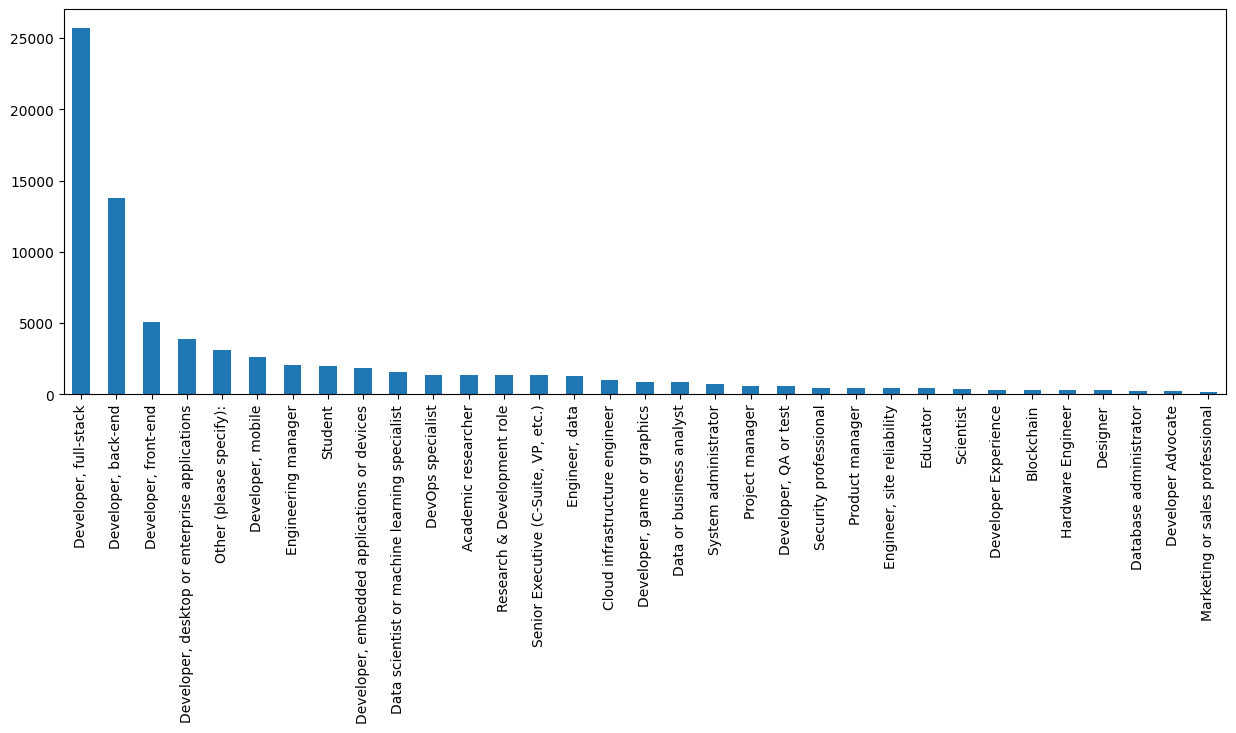

In [9]:
# Display Job Frequency
df['DevType'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,5))

#### Display Skills frequency

In [10]:
# Display Skills Frequency
skills_freq = df.copy().drop('DevType', axis=1).sum().reset_index()
skills_freq.columns = ['group', 'skill', 'freq']

In [11]:
skills_freq.sort_values(by='freq', ascending=False)

,group,skill,freq
266,NEWCollabToolsHaveWorkedWith,Visual Studio Code,63793
24,LanguageHaveWorkedWith,JavaScript,55711
21,LanguageHaveWorkedWith,HTML/CSS,46396
37,LanguageHaveWorkedWith,Python,43158
43,LanguageHaveWorkedWith,SQL,42623
...,...,...,...
229,ToolsTechHaveWorkedWith,snitch,55
225,ToolsTechHaveWorkedWith,lest,55
182,ToolsTechHaveWorkedWith,CUTE,54
190,ToolsTechHaveWorkedWith,ELFspy,51


In [14]:
fig = px.treemap(data_frame=skills_freq,
           path=['group', 'skill'],
           values='freq',
           color='freq',
           color_continuous_scale='deep')
fig.update_layout(width = 2000, height = 1000)
fig.show()

#### Create Jobs & Skills Heatmap

In [22]:
sorted_roles = df['DevType'].sum().sort_values().index.tolist()
sorted_skills = df.drop('DevType', axis=1).sum().sort_values(ascending=False).droplevel(level=0).index.tolist()

In [23]:
skills = []

# For each role, calculate the percentage of each skill
for role in sorted_roles:
    # Filter for the role
    role_mask = (df[('DevType', role)] == 1)

    #For each skill column, calculate mean of the one-hot-encoded -> percentage
    skills_role = pd.concat({tech_col: df.loc[role_mask, tech_col].mean() * 100
                             for tech_col in TECH_COLS})

    # Append to original list
    skills.append(skills_role)

# Concat and format
skills = pd.concat(skills, axis=1)
skills.columns = sorted_roles
skills = skills.reset_index(level=0, drop=True)
skills = skills.loc[sorted_skills]
skills = skills.T

In [24]:
skills

,Visual Studio Code,JavaScript,HTML/CSS,Python,SQL,Docker,npm,PostgreSQL,TypeScript,Amazon Web Services (AWS),...,build2,TiDB,Raku,condo,tunit,snitch,lest,CUTE,ELFspy,liblittletest
Marketing or sales professional,57.718121,56.375839,55.704698,45.637584,40.939597,28.187919,32.214765,30.872483,16.778523,32.214765,...,2.013423,2.684564,0.671141,1.342282,1.342282,0.671141,0.671141,1.342282,0.671141,0.671141
Developer Advocate,73.584906,63.679245,56.603774,42.452830,46.698113,52.830189,43.867925,44.339623,34.433962,50.943396,...,0.000000,0.000000,0.000000,0.000000,0.471698,0.000000,0.471698,0.000000,0.000000,0.000000
Database administrator,51.361868,29.571984,31.517510,42.412451,82.879377,25.680934,11.284047,30.350195,6.614786,29.571984,...,0.389105,0.778210,0.389105,0.389105,0.389105,0.389105,0.000000,0.000000,0.000000,0.000000
Designer,58.007117,61.565836,62.989324,30.249110,29.893238,21.352313,30.604982,16.725979,18.149466,21.352313,...,0.355872,0.000000,0.711744,0.355872,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Hardware Engineer,58.741259,25.524476,27.622378,69.930070,22.027972,26.573427,15.734266,12.937063,6.993007,14.685315,...,0.000000,0.000000,1.048951,0.349650,0.349650,0.000000,0.000000,0.349650,0.000000,0.349650
Blockchain,68.111455,62.229102,38.390093,41.795666,30.340557,52.631579,50.464396,50.154799,52.321981,50.773994,...,0.928793,0.619195,0.309598,0.619195,0.619195,0.309598,0.619195,0.309598,0.309598,0.309598
Developer Experience,73.312883,55.214724,38.343558,49.693252,36.503067,55.521472,41.411043,36.503067,40.184049,51.226994,...,0.920245,0.613497,0.000000,1.226994,0.306748,0.306748,0.306748,0.613497,0.306748,0.000000
Scientist,51.566952,27.635328,25.071225,77.492877,27.920228,29.344729,12.250712,19.943020,7.122507,21.367521,...,0.284900,0.284900,0.284900,0.569801,0.284900,0.284900,0.284900,0.000000,0.000000,0.284900
Educator,65.542169,57.831325,56.144578,63.132530,45.783133,27.951807,31.325301,29.638554,20.000000,25.060241,...,0.000000,0.000000,0.240964,0.240964,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Engineer, site reliability",71.896956,49.882904,40.046838,71.896956,44.496487,72.131148,38.875878,55.503513,31.850117,64.402810,...,0.000000,0.234192,0.234192,0.234192,0.000000,0.000000,0.234192,0.000000,0.000000,0.000000


In [25]:
fig = go.Figure(data=go.Heatmap(z=skills, x=skills.columns,y=skills.index, colorscale='magma', ygap=1))
fig.update_layout(width=2500, height=700)
fig.show()

#### Create Jobs dendrogram

In [33]:
fig = ff.create_dendrogram(skills, labels=sorted_roles, orientation='left', color_threshold=0)
fig.update_layout(height=700, width=1000, showlegend=False)
fig.show()

#### Normalizing features

In [34]:
std_skills = StandardScaler().fit_transform(skills)
std_skills = pd.DataFrame(std_skills, columns=skills.columns, index=skills.index)

In [35]:
fig = go.Figure(data=go.Heatmap(z=std_skills, x=skills.columns,y=skills.index, colorscale='magma', ygap=1))
fig.update_layout(width=2500, height=700)
fig.show()

In [36]:
fig = ff.create_dendrogram(std_skills, labels=sorted_roles, orientation='left', color_threshold=0)
fig.update_layout(height=700, width=1000, showlegend=False)
fig.show()

#### Job profiles

In [37]:
sorted_roles

['Marketing or sales professional',
 'Developer Advocate',
 'Database administrator',
 'Designer',
 'Hardware Engineer',
 'Blockchain',
 'Developer Experience',
 'Scientist',
 'Educator',
 'Engineer, site reliability',
 'Product manager',
 'Security professional',
 'Developer, QA or test',
 'Project manager',
 'System administrator',
 'Data or business analyst',
 'Developer, game or graphics',
 'Cloud infrastructure engineer',
 'Engineer, data',
 'Senior Executive (C-Suite, VP, etc.)',
 'Research & Development role',
 'Academic researcher',
 'DevOps specialist',
 'Data scientist or machine learning specialist',
 'Developer, embedded applications or devices',
 'Student',
 'Engineering manager',
 'Developer, mobile',
 'Other (please specify):',
 'Developer, desktop or enterprise applications',
 'Developer, front-end',
 'Developer, back-end',
 'Developer, full-stack']

In [51]:
#role = np.random.choice(sorted_roles)
role = 'Data scientist or machine learning specialist'
# role = 'Developer, back-end'
role

'Data scientist or machine learning specialist'

In [52]:
single_role_skills = pd.concat([skills.loc[role], std_skills.loc[role]], axis=1)
single_role_skills.columns = ['percentage', 'specificity']
single_role_skills = single_role_skills.sort_values('percentage')

In [53]:
threshold = 10

single_role_skills = single_role_skills[single_role_skills['percentage'] > threshold]

fig = px.bar(df, 
             y=single_role_skills.index, 
             x=single_role_skills['percentage'], 
             color=single_role_skills['specificity'], 
             color_continuous_scale='orrd', 
             range_color=[std_skills.values.min(),std_skills.values.max()],
             orientation='h')

fig.update_layout(width=800, height=800, title=role)
fig.show()